In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import pickle
import numpy as np
import pandas as pd
from IPython.display import clear_output
from scipy.stats import norm

In [2]:
fig = plt.figure(figsize=(7.2, 5.2))

<Figure size 518.4x374.4 with 0 Axes>

In [3]:
param = '1'
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams.update({'font.size': 8})

In [4]:
epLen = 5

            Unnamed: 0   iteration  epReward  Number of Balls  episode
episode                                                               
1509.0   264249.000000  175.000000  2.420000            500.0   1509.0
1609.0   291319.555556  180.944444  2.426123            500.0   1609.0
1709.0   317235.666667  185.518519  2.426123            500.0   1709.0
1809.0   343899.000000  190.000000  2.426123            500.0   1809.0
1909.0   372449.000000  195.000000  2.426123            500.0   1909.0
            Unnamed: 0   iteration  epReward  Number of Balls  episode
episode                                                               
1509.0   264249.000000  175.000000  3.445384       243.408163   1509.0
1609.0   291319.555556  180.944444  3.514366       247.333333   1609.0
1709.0   317235.666667  185.518519  3.500517       249.444444   1709.0
1809.0   343899.000000  190.000000  3.485556       252.894737   1809.0
1909.0   372449.000000  195.000000  3.486630       259.333333   1909.0
      

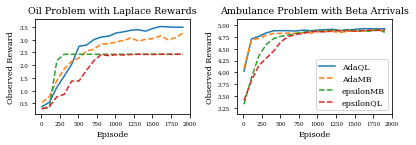

In [5]:
problem = 'oil'
typ = 'laplace'
param = '10'


        
        
        
name_adapt = './data/'+problem+'_'+typ+'_'+param+'_adaQL.csv'
name_adapt_model_based = './data/'+problem+'_'+typ+'_'+param+'_adaMB_Full.csv'
# name_adapt_flag_model_based = './data/oil_'+problem+'_'+'adapt_flag_'+param+'.csv'
name_net = './data/'+problem+'_'+typ+'_'+param+'_epsQL.csv'
name_enet_model = './data/'+problem+'_'+typ+'_'+param+'_epsMB_One.csv'

dt_adapt_model = pd.read_csv(name_adapt_model_based).groupby(['episode']).mean()
dt_net_model = pd.read_csv(name_enet_model).groupby(['episode']).mean()
dt_adapt = pd.read_csv(name_adapt).groupby(['episode']).mean()
dt_net = pd.read_csv(name_net).groupby(['episode']).mean()

max_val = max(dt_adapt.tail(1)['epReward'].iloc[0], dt_adapt_model.tail(1)['epReward'].iloc[0], dt_net.tail(1)['epReward'].iloc[0], dt_net_model.tail(1)['epReward'].iloc[0])
min_val = min(dt_adapt.head(1)['epReward'].iloc[0], dt_adapt_model.head(1)['epReward'].iloc[0], dt_net.head(1)['epReward'].iloc[0], dt_net_model.head(1)['epReward'].iloc[0])

dt_adapt_model['episode'] = dt_adapt_model.index.values
dt_adapt_model = dt_adapt_model.iloc[::10, :]
dt_net_model['episode'] = dt_net_model.index.values
dt_net_model = dt_net_model.iloc[::10, :]
dt_adapt['episode'] = dt_adapt.index.values
dt_net['episode'] = dt_net.index.values
dt_net = dt_net.iloc[::10, :]
dt_adapt = dt_adapt.iloc[::10, :]


fig = plt.figure(figsize=(5.8, 3.5))
plt.subplot(2,2,1)

plt.plot(dt_adapt['episode'], dt_adapt['epReward'], label='AdaQL')
plt.plot(dt_adapt_model['episode'], dt_adapt_model['epReward'], label='AdaMB', linestyle='--')
# plt.plot(dt_adapt_model_flag['episode'], dt_adapt_model_flag['epReward'], label='ModelAdaptiveFlag', linestyle='--')
plt.plot(dt_net_model['episode'], dt_net_model['epReward'], label='epsilonMB', linestyle='--')
plt.plot(dt_net['episode'], dt_net['epReward'], label = 'epsilonQL', linestyle='--')

plt.ylim(min_val - .2,max_val+.2)
plt.xlabel('Episode')
plt.ylabel('Observed Reward')
# plt.legend()
plt.title('Oil Problem with Laplace Rewards')

print(dt_net.tail())
print(dt_adapt.tail())
print(dt_adapt_model.tail())

problem = 'ambulance'
typ = 'beta'
param = '1'


name_adapt = './data/'+problem+'_'+typ+'_'+param+'_adaQL.csv'
name_adapt_model_based = './data/'+problem+'_'+typ+'_'+param+'_adaMB_Full.csv'
# name_adapt_flag_model_based = './data/oil_'+problem+'_'+'adapt_flag_'+param+'.csv'
name_net = './data/'+problem+'_'+typ+'_'+param+'_epsQL.csv'
name_enet_model = './data/'+problem+'_'+typ+'_'+param+'_epsMB_One.csv'

dt_adapt_model = pd.read_csv(name_adapt_model_based).groupby(['episode']).mean()
dt_net_model = pd.read_csv(name_enet_model).groupby(['episode']).mean()
dt_adapt = pd.read_csv(name_adapt).groupby(['episode']).mean()
dt_net = pd.read_csv(name_net).groupby(['episode']).mean()

max_val = max(dt_adapt.tail(1)['epReward'].iloc[0], dt_adapt_model.tail(1)['epReward'].iloc[0], dt_net.tail(1)['epReward'].iloc[0], dt_net_model.tail(1)['epReward'].iloc[0])
min_val = min(dt_adapt.head(1)['epReward'].iloc[0], dt_adapt_model.head(1)['epReward'].iloc[0], dt_net.head(1)['epReward'].iloc[0], dt_net_model.head(1)['epReward'].iloc[0])

dt_adapt_model['episode'] = dt_adapt_model.index.values
dt_adapt_model = dt_adapt_model.iloc[::10, :]
dt_net_model['episode'] = dt_net_model.index.values
dt_net_model = dt_net_model.iloc[::10, :]
dt_adapt['episode'] = dt_adapt.index.values
dt_net['episode'] = dt_net.index.values
dt_net = dt_net.iloc[::10, :]
dt_adapt = dt_adapt.iloc[::10, :]

plt.subplot(2,2,2)

plt.plot(dt_adapt['episode'], dt_adapt['epReward'], label='AdaQL')
plt.plot(dt_adapt_model['episode'], dt_adapt_model['epReward'], label='AdaMB', linestyle='--')
# plt.plot(dt_adapt_model_flag['episode'], dt_adapt_model_flag['epReward'], label='ModelAdaptiveFlag', linestyle='--')
plt.plot(dt_net_model['episode'], dt_net_model['epReward'], label='epsilonMB', linestyle='--')
plt.plot(dt_net['episode'], dt_net['epReward'], label = 'epsilonQL', linestyle='--')
max_val = max(dt_adapt.tail(1)['epReward'].iloc[0], dt_adapt_model.tail(1)['epReward'].iloc[0], dt_net.tail(1)['epReward'].iloc[0], dt_net_model.tail(1)['epReward'].iloc[0])


plt.ylim(min_val-.2,max_val+.2)
plt.xlabel('Episode')
plt.ylabel('Observed Reward')
plt.legend()
plt.title('Ambulance Problem with Beta Arrivals')

print(dt_net.tail())
print(dt_adapt.tail())
print(dt_adapt_model.tail())

plt.tight_layout()
fig.savefig('combine_plot_paper.pdf', bbox_inches = 'tight',
     pad_inches = 0.01, dpi=900)
plt.show()





